In [ ]:
# TODO
# feature transformation, polynomials, etc.
# normalize features
# Director with past ratings spread
# Get summary stats of regression
# residual plot
# plot resids vs. best factor to see if there is heteroskedasticity
# histogram of features to see if transformations necessary


In [164]:
import pandas as pd
import numpy as np
from patsy import dmatrices

In [165]:
data = pd.read_csv("moviesdata150715_2014.csv")
data.shape

(9320, 7)

In [166]:
data.head(10)

,Unnamed: 0,ID,Genre,Rating,Review,Metascore,Budget
0,0,tt3524032,"Comedy, Romance",NaN,4.4,NaN,NaN
1,1,tt2075318,"Comedy, Drama, Romance",NaN,5.7,NaN,NaN
2,2,tt3887700,Drama,NaN,7.2,NaN,NaN
3,3,tt2477324,"Horror, Thriller",NaN,NaN,NaN,400000
4,4,tt2106284,Drama,NaN,7.1,NaN,NaN
5,5,tt2614684,"Action, Drama, Thriller",R,7.2,83,NaN
6,6,tt4199762,"Comedy, Romance",NaN,NaN,NaN,NaN
7,7,tt2405820,"Horror, Thriller",NaN,4.6,NaN,NaN
8,8,tt4024410,"Drama, Romance",NaN,6.0,NaN,NaN
9,9,tt4333982,Drama,NaN,NaN,NaN,NaN


In [167]:
data = data.drop('Unnamed: 0', 1)

In [168]:
data.head()

,ID,Genre,Rating,Review,Metascore,Budget
0,tt3524032,"Comedy, Romance",NaN,4.4,NaN,NaN
1,tt2075318,"Comedy, Drama, Romance",NaN,5.7,NaN,NaN
2,tt3887700,Drama,NaN,7.2,NaN,NaN
3,tt2477324,"Horror, Thriller",NaN,NaN,NaN,400000
4,tt2106284,Drama,NaN,7.1,NaN,NaN


In [169]:
data = data.dropna()

In [170]:
data.shape

(176, 6)

In [171]:
data.columns.values.tolist()

['ID', 'Genre', 'Rating', 'Review', 'Metascore', 'Budget']

In [172]:
for index, row in data.iterrows():
    genres = row['Genre'].replace(",","").split()
    for genre in genres:
        print genre
        if genre in data.columns.values.tolist():
            data.set_value(index, genre, 1.0)
        else:
            data[genre] = pd.Series(0, index = data.index)
            data.set_value(index, genre, 1.0)

Comedy
Horror
Thriller
Action
Comedy
Crime
Action
Drama
Thriller
Action
Drama
Fantasy
War
Drama
Drama
Comedy
Horror
Comedy
Western
Action
Crime
Drama
Thriller
Crime
Drama
Thriller
Crime
Drama
Mystery
Thriller
Comedy
Romance
Comedy
Family
Drama
Action
Biography
Drama
History
Thriller
War
Comedy
Drama
Romance
Horror
Mystery
Comedy
Drama
Family
Musical
Drama
Mystery
Sci-Fi
Action
Sci-Fi
Thriller
Comedy
Drama
Romance
Drama
Music
Biography
Crime
Drama
Romance
Animation
Action
Adventure
Comedy
Family
Sci-Fi
Comedy
Drama
Drama
Comedy
Romance
Drama
Action
Crime
Drama
Thriller
Drama
Drama
War
Biography
Comedy
Drama
Romance
Action
Adventure
Sci-Fi
Action
Drama
Sci-Fi
Thriller
Horror
Thriller
Biography
Drama
Horror
Mystery
Adventure
Mystery
Sci-Fi
Drama
Family
Action
Drama
Fantasy
Horror
War
Drama
Sport
Comedy
Drama
Thriller
Adventure
Family
Sci-Fi
Action
Adventure
Mystery
Sci-Fi
Comedy
Drama
Romance
Drama
Romance
Romance
Thriller
Action
Adventure
Drama
Action
Adventure
Action
Drama
War
Drama
Fam

In [173]:
data
data['Action'] = pd.Series(0, index=data.index)

In [174]:
data.head(100)

,ID,Genre,Rating,Review,Metascore,Budget,Comedy,Horror,Thriller,Action,...,Romance,Family,Biography,History,Musical,Sci-Fi,Music,Animation,Adventure,Sport
52,tt2059171,"Comedy, Horror, Thriller",R,6.3,44,4000000,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
93,tt2294449,"Action, Comedy, Crime",R,7.1,71,50000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,tt2172934,"Action, Drama, Thriller",PG-13,6.2,40,28000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
124,tt1253863,"Action, Drama, Fantasy, War",R,6.3,48,110000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151,tt1777595,Drama,PG-13,6.6,37,10000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,tt2891174,Drama,R,7.2,71,8000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228,tt2828996,"Comedy, Horror",R,4.7,17,3500000,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
259,tt2557490,"Comedy, Western",R,6.1,44,40000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,tt2937898,"Action, Crime, Drama, Thriller",R,7.1,79,20000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
263,tt1972571,"Crime, Drama, Thriller",R,6.9,73,15000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [341]:
pd.unique(data.Rating.ravel())

array(['R', 'PG-13', 'PG', 'PG-'], dtype=object)

In [175]:
data = data.drop('ID', 1)

In [176]:
data = data.drop('Genre', 1)

In [177]:
data.head(5)

,Rating,Review,Metascore,Budget,Comedy,Horror,Thriller,Action,Crime,Drama,...,Romance,Family,Biography,History,Musical,Sci-Fi,Music,Animation,Adventure,Sport
52,R,6.3,44,4000000,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,R,7.1,71,50000000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
107,PG-13,6.2,40,28000000,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
124,R,6.3,48,110000000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
151,PG-13,6.6,37,10000000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [178]:
import matplotlib.pylab as plt
import seaborn as sns

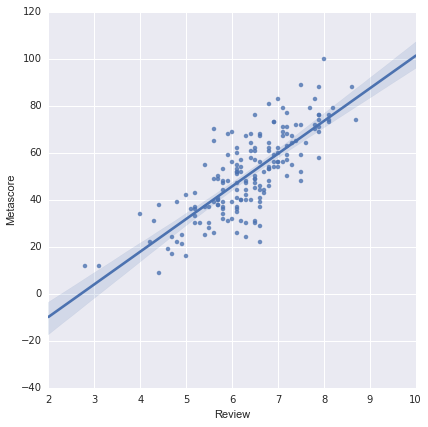

In [179]:
sns.pairplot(data, x_vars=['Review'],y_vars=['Metascore'],size=6, aspect=1.0, kind='reg')

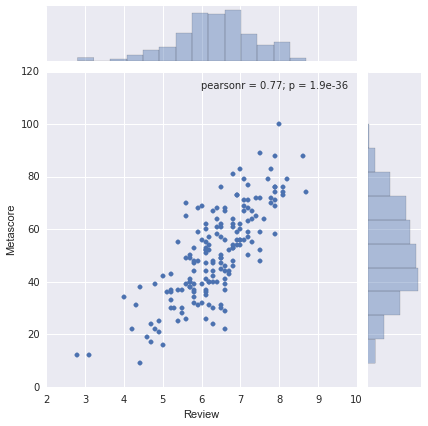

In [180]:
sns.jointplot(data=data, x='Review',y='Metascore')

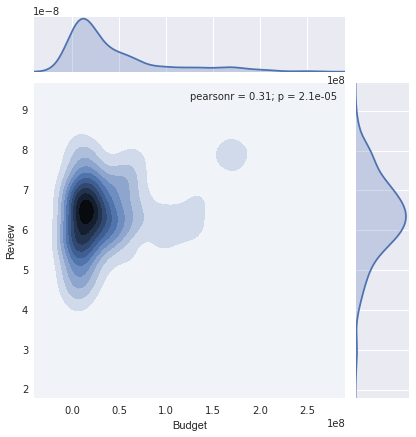

In [181]:
sns.jointplot(x="Budget", y="Review", data=data, kind="kde");

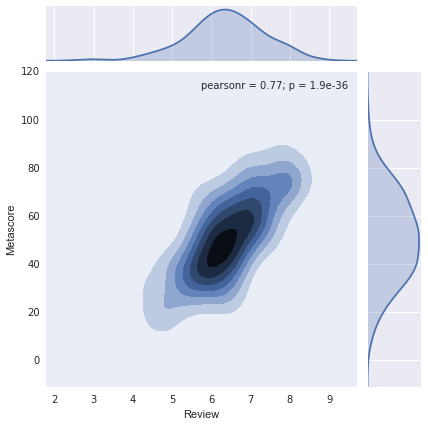

In [321]:
sns.jointplot(x="Review", y="Metascore", data=data, kind="kde");

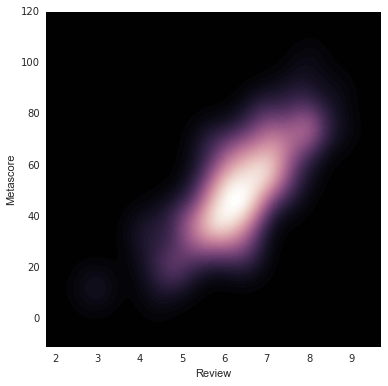

In [320]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(data.Review, data.Metascore, cmap=cmap, n_levels=100, shade=True);

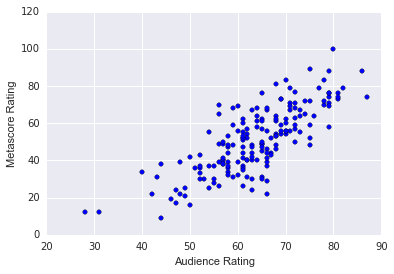

In [322]:
%matplotlib inline
plt.scatter(data.Review*10,data.Metascore)
plt.xlabel("Audience Rating")
plt.ylabel("Metascore Rating")

In [323]:
feature_cols=['Rating',
 'Budget',
 'Comedy',
 'Horror',
 'Thriller',
 'Action',
 'Crime',
 'Drama',
 'Fantasy',
 'War',
 'Western',
 'Mystery',
 'Romance',
 'Family',
 'Biography',
 'History',
 'Musical',
 'Sci-Fi',
 'Music',
 'Animation',
 'Adventure',
 'Sport']

In [324]:
X = data[feature_cols]
X.head(5)

,Rating,Budget,Comedy,Horror,Thriller,Action,Crime,Drama,Fantasy,War,...,Romance,Family,Biography,History,Musical,Sci-Fi,Music,Animation,Adventure,Sport
52,R,4000000,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,R,50000000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,PG-13,28000000,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
124,R,110000000,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
151,PG-13,10000000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [325]:
y = data.Review * 10 - data.Metascore

In [326]:
print type(y)
y.head(5)

<class 'pandas.core.series.Series'>


52     19
93      0
107    22
124    15
151    29
dtype: float64

In [327]:
data.head()

,Rating,Review,Metascore,Budget,Comedy,Horror,Thriller,Action,Crime,Drama,...,Family,Biography,History,Musical,Sci-Fi,Music,Animation,Adventure,Sport,AudienceMinusMetacore
52,R,6.3,44,4000000,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,19
93,R,7.1,71,50000000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
107,PG-13,6.2,40,28000000,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,22
124,R,6.3,48,110000000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,15
151,PG-13,6.6,37,10000000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,29


In [328]:
data["AudienceMinusMetacore"] = pd.Series(0, index = data.index)
data['AudienceMinusMetacore'] = data.Review * 10 - data.Metascore

In [329]:
data.columns.values.tolist()

['Rating',
 'Review',
 'Metascore',
 'Budget',
 'Comedy',
 'Horror',
 'Thriller',
 'Action',
 'Crime',
 'Drama',
 'Fantasy',
 'War',
 'Western',
 'Mystery',
 'Romance',
 'Family',
 'Biography',
 'History',
 'Musical',
 'Sci-Fi',
 'Music',
 'Animation',
 'Adventure',
 'Sport',
 'AudienceMinusMetacore']

In [364]:
datanew = data.drop('Review', 1)
datanew = datanew.drop('Metascore', 1)
datanew.head

<bound method DataFrame.head of      Rating     Budget  Comedy  Horror  Thriller  Action  Crime  Drama  \
52        R    4000000       1       1         1       0      0      0   
93        R   50000000       1       0         0       0      1      0   
107   PG-13   28000000       0       0         1       0      0      1   
124       R  110000000       0       0         0       0      0      1   
151   PG-13   10000000       0       0         0       0      0      1   
181       R    8000000       0       0         0       0      0      1   
228       R    3500000       1       1         0       0      0      0   
259       R   40000000       1       0         0       0      0      0   
262       R   20000000       0       0         1       0      1      1   
263       R   15000000       0       0         1       0      1      1   
319       R   28000000       0       0         1       0      1      1   
365       R   12500000       1       0         0       0      0      0   
491   

In [331]:
datanew.columns.values.tolist()

['Rating',
 'Budget',
 'Comedy',
 'Horror',
 'Thriller',
 'Action',
 'Crime',
 'Drama',
 'Fantasy',
 'War',
 'Western',
 'Mystery',
 'Romance',
 'Family',
 'Biography',
 'History',
 'Musical',
 'Sci-Fi',
 'Music',
 'Animation',
 'Adventure',
 'Sport',
 'AudienceMinusMetacore']

In [332]:
yregress = datanew['AudienceMinusMetacore']

In [343]:
xregress = datanew.drop('AudienceMinusMetacore', 1)
xregress["G"] = pd.Series(0, index = xregress.index)
xregress["PG-13"] = pd.Series(0, index = xregress.index)
xregress["PG"] = pd.Series(0, index = xregress.index)
xregress["R"] = pd.Series(0, index = xregress.index)

In [344]:
xregress.columns.values.tolist()

['Rating',
 'Budget',
 'Comedy',
 'Horror',
 'Thriller',
 'Action',
 'Crime',
 'Drama',
 'Fantasy',
 'War',
 'Western',
 'Mystery',
 'Romance',
 'Family',
 'Biography',
 'History',
 'Musical',
 'Sci-Fi',
 'Music',
 'Animation',
 'Adventure',
 'Sport',
 'G',
 'PG-13',
 'PG',
 'R']

In [345]:
xregress = xregress.replace(to_replace='PG-', value='PG-13')

In [346]:
for index, row in xregress.iterrows():
    xregress.set_value(index, row['Rating'], 1.0)

In [347]:
xregress = xregress.drop('Rating', 1)

In [363]:
xregress

,Budget,Comedy,Horror,Thriller,Action,Crime,Drama,Fantasy,War,Western,...,Musical,Sci-Fi,Music,Animation,Adventure,Sport,G,PG-13,PG,R
52,4000000,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
93,50000000,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
107,28000000,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
124,110000000,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
151,10000000,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
181,8000000,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
228,3500000,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
259,40000000,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
262,20000000,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
263,15000000,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [349]:
xregress.dtypes

Budget       float64
Comedy         int64
Horror         int64
Thriller       int64
Action         int64
Crime          int64
Drama          int64
Fantasy        int64
War            int64
Western        int64
Mystery        int64
Romance        int64
Family         int64
Biography      int64
History        int64
Musical        int64
Sci-Fi         int64
Music          int64
Animation      int64
Adventure      int64
Sport          int64
G              int64
PG-13          int64
PG             int64
R              int64
dtype: object

In [350]:
yregress

52      19
93       0
107     22
124     15
151     29
181      1
228     30
259     17
262     -8
263     -4
319      8
365     -1
491      8
543     24
585      2
625     19
657     17
659     19
801     35
825     24
928     44
1058    -4
1074     8
1076     5
1106    -9
1130    20
1136    34
1246   -20
1282    17
1393    16
        ..
7773    20
7776    -5
7801    39
7847    13
7873     9
7916    21
7939    21
7988    27
8003    15
8005    23
8062     0
8108     8
8119     1
8187     6
8262    22
8346    19
8360    22
8531    21
8532    26
8591    -1
8675    13
8706     0
8820     6
9031    25
9050   -11
9051    -2
9102    31
9109    24
9128    15
9161     7
Name: AudienceMinusMetacore, dtype: float64

In [351]:
print type(yregress)

<class 'pandas.core.series.Series'>


In [352]:
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(xregress, yregress, random_state=1)

print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(132, 25) (44, 25) (132,) (44,)


In [353]:
xregress.isnull().any().any()

False

In [354]:
linreg = linear_model.LinearRegression()

In [355]:
linreg.fit(X_train, Y_train) # do i need to normalize budget?

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [356]:
print linreg.intercept_
print linreg.coef_

17.7264221773
[ -1.95077085e-08   3.00717051e+00  -3.00965366e+00   8.18619545e-01
   2.29598340e-16   3.09625444e-01  -7.38431807e+00   2.06922838e-01
   9.26636867e+00  -2.16959213e+00   6.32036859e-01   5.95052564e+00
  -9.76868870e+00  -5.51837096e+00  -2.07074531e+01  -5.80892477e+00
  -2.88140341e+00   1.22541896e+00  -2.47485009e+00  -3.64370652e+00
   5.80738786e+00   1.61692885e-15   2.27387415e+00   3.04816629e+00
  -5.32204043e+00]


In [357]:
zip(xregress.columns.values.tolist(), linreg.coef_)

[('Budget', -1.9507708514280016e-08),
 ('Comedy', 3.0071705133659288),
 ('Horror', -3.0096536574817754),
 ('Thriller', 0.8186195451148317),
 ('Action', 2.2959833962180502e-16),
 ('Crime', 0.30962544374264667),
 ('Drama', -7.3843180651343108),
 ('Fantasy', 0.20692283846918413),
 ('War', 9.2663686672329195),
 ('Western', -2.1695921298722975),
 ('Mystery', 0.63203685916047447),
 ('Romance', 5.9505256416892625),
 ('Family', -9.7686886950136156),
 ('Biography', -5.5183709573621966),
 ('History', -20.707453129855754),
 ('Musical', -5.8089247676911979),
 ('Sci-Fi', -2.881403408341809),
 ('Music', 1.2254189615751252),
 ('Animation', -2.4748500938095352),
 ('Adventure', -3.6437065208000035),
 ('Sport', 5.8073878612524998),
 ('G', 1.6169288477172734e-15),
 ('PG-13', 2.273874145290057),
 ('PG', 3.048166287901422),
 ('R', -5.322040433191483)]

In [358]:
y_pred_test = linreg.predict(X_test)

In [359]:
y_pred_train = linreg.predict(X_train)

In [360]:
from sklearn import metrics
print np.sqrt( metrics.mean_absolute_error(Y_test, y_pred_test) )

3.25867597608


In [361]:
print np.sqrt( metrics.mean_absolute_error(Y_train, y_pred_train) )

2.91861698747


In [ ]:
#X_train, X_test, Y_train, Y_test

Train Variance score: 0.25
Test Variance score: -0.44


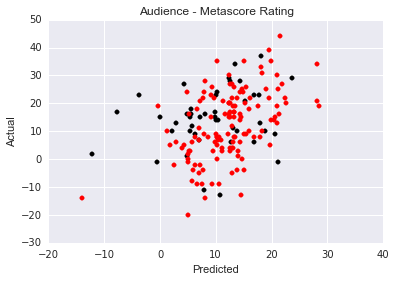

In [362]:
# Explained variance score: 1 is perfect prediction
print('Train Variance score: %.2f' % linreg.score(X_train, Y_train))
print('Test Variance score: %.2f' % linreg.score(X_test, Y_test))

# Plot outputs
plt.scatter(linreg.predict(X_test), Y_test,  color='black')
plt.scatter(linreg.predict(X_train), Y_train,  color='red')
plt.title('Audience - Metascore Rating')
plt.xlabel('Predicted')
plt.ylabel('Actual')


#plt.plot(X_test, linreg.predict(X_test), color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

In [218]:
#cat input1.csv input2.csv input3.csv > combined.csv